In [1]:
# 2_data_loading_test
import sys
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid 

sys.path.append('..')
from src.config import config
from src.dataset import HAM10000Dataset
from src.transforms import get_transforms

# Denormalize function 
def denormalize(tensor):
    mean = np.array(config.IMAGENET_MEAN).reshape(3, 1, 1)
    std = np.array(config.IMAGENET_STD).reshape(3, 1, 1)
    image = tensor.numpy() * std + mean 
    image = np.clip(image, 0, 1) # crop edge 0-1
    return image.transpose(1, 2, 0) # change axis (H, W, C) for matplotlib

✓ SkinCancerClassification v1.0.0
Note: Other modules will be loaded as they are created


In [2]:
from torch.utils.data import DataLoader

transforms_dict = get_transforms(split='train')
print(f"Transforms Type: {type(transforms_dict)}") # Check if it's a dict

# Create the dataset
train_dataset = HAM10000Dataset(
    config.PROCESSED_DATA_DIR / 'train.csv',
    transform=transforms_dict
)

print(f"Dataset Loaded: {len(train_dataset)} images")

# 3. Load a single batch (batch size = 16 pictures)
loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
images, labels = next(iter(loader))

print(f"Batch Shape: {images.shape}")
print(f"Labels: {labels}")

Transforms Type: <class 'dict'>
Dataset Loaded: 7054 images
Batch Shape: torch.Size([16, 3, 224, 224])
Labels: tensor([5, 2, 5, 5, 2, 5, 5, 5, 5, 2, 4, 5, 2, 5, 5, 5])


In [3]:
# ดึงภาพใบแรกมาเช็ค
sample_idx = 0
raw_tensor = images[sample_idx]
denorm_img = denormalize(raw_tensor) 

print(f"\n{'='*20} VERIFICATION REPORT {'='*20}")

# Check raw tensor values (should be negative and positive)
print(f"1. Normalized Tensor (Input to Model):")
print(f"   Range: [{raw_tensor.min():.4f}, {raw_tensor.max():.4f}]")
print(f"   Mean:  {raw_tensor.mean():.4f} (Should be close to 0)")

# Check values after denormalization (should be within 0-1)
print(f"\n2. Denormalized Image (For Display):")
print(f"   Range: [{denorm_img.min():.4f}, {denorm_img.max():.4f}]")
is_valid = (denorm_img.min() >= -0.1 and denorm_img.max() <= 1.1) 
print(f"   Check: {'PASS' if is_valid else 'FAIL'}")
print(f"{'='*60}")


==================== VERIFICATION REPORT ====================
1. Normalized Tensor (Input to Model):
   Range: [-2.1179, 1.9578]
   Mean:  0.2374 (Should be close to 0)

2. Denormalized Image (For Display):
   Range: [0.0000, 0.9333]
   Check: PASS


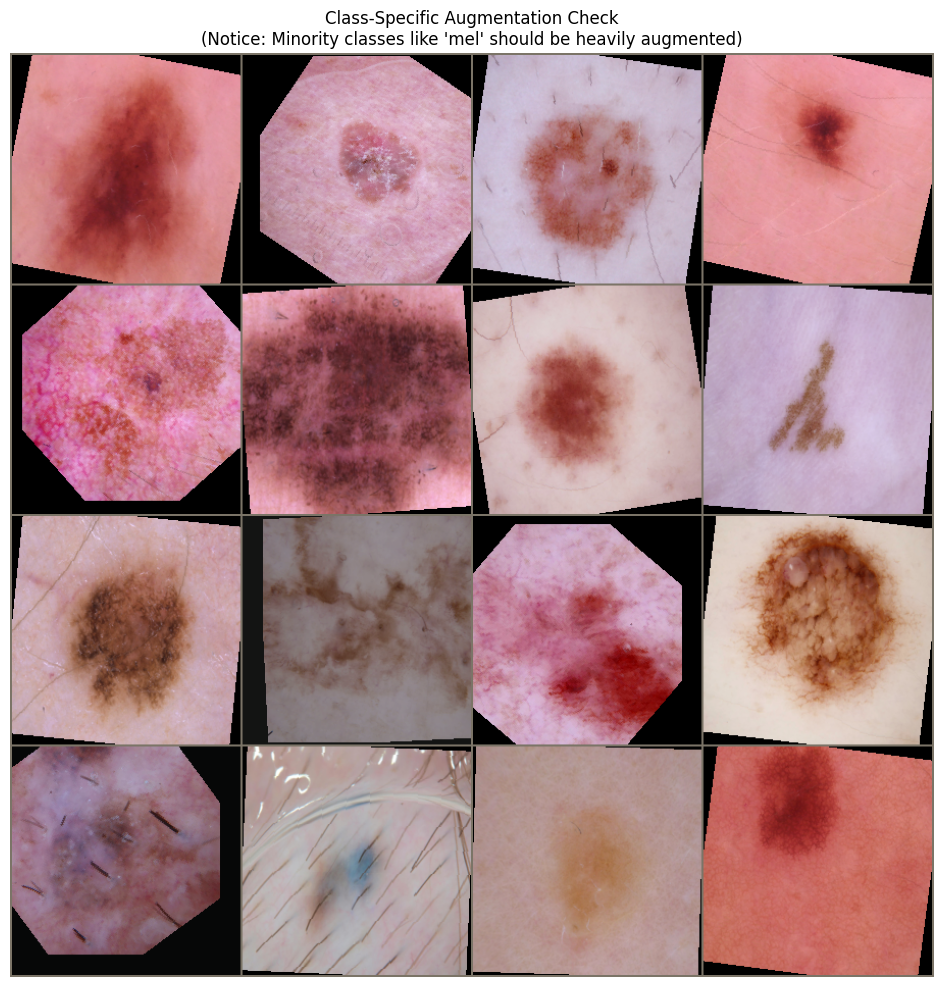

Labels in this batch:
Img 1: nv -> Light
Img 2: bkl -> HEAVY
Img 3: nv -> Light
Img 4: nv -> Light
Img 5: bkl -> HEAVY
Img 6: nv -> Light
Img 7: nv -> Light
Img 8: nv -> Light
Img 9: nv -> Light
Img 10: bkl -> HEAVY
Img 11: mel -> HEAVY
Img 12: nv -> Light
Img 13: bkl -> HEAVY
Img 14: nv -> Light
Img 15: nv -> Light
Img 16: nv -> Light


In [4]:
# Display 16 images
plt.figure(figsize=(12, 12))
grid_img = make_grid(images[:16], nrow=4)
plt.imshow(denormalize(grid_img))
plt.axis('off')
plt.title("Class-Specific Augmentation Check\n(Notice: Minority classes like 'mel' should be heavily augmented)")
plt.show()

# Display corresponding labels
print("Labels in this batch:")
for i, l in enumerate(labels[:16]):
    class_name = config.IDX_TO_CLASS[l.item()]
    # Highlight if it's a minority class
    marker = "HEAVY" if class_name in config.MINORITY_CLASSES else "Light"
    print(f"Img {i+1}: {class_name} -> {marker}")